---

## ⭐ Hope you enjoyed this Notebook!  
### 🙏 Your <span style="color:#e63946; font-weight:bold; text-transform: uppercase;">upvotes</span> & <span style="color:#1d3557; font-weight:bold;">comments</span> mean a lot! 💬❤️

---


In [81]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.layers import Dense, Flatten ,Dropout


In [82]:
minst = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = minst.load_data()

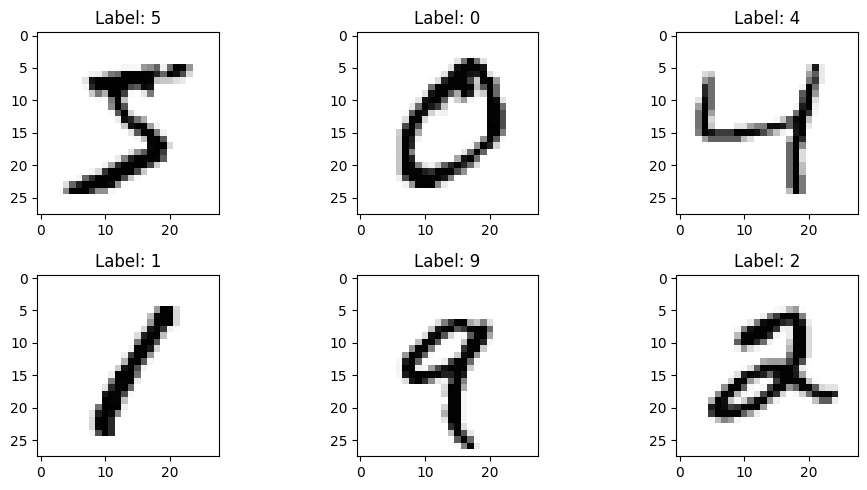

In [83]:
# Display multiple images in a subplot
plt.figure(figsize=(10, 5))

for i in range(6):  # Display 6 images
    plt.subplot(2, 3, i + 1)  # 2 rows, 3 columns
    plt.imshow(X_train[i], cmap=plt.get_cmap('Greys'))
    plt.title(f"Label: {y_train[i]}")
    # plt.axis('off')  # Hide axes

plt.tight_layout()
plt.show()

In [84]:
print("Shape of X_train is: ",X_train.shape )
print("Shape of X_test is: ",X_test.shape )

Shape of X_train is:  (60000, 28, 28)
Shape of X_test is:  (10000, 28, 28)


In [85]:
print("Shape of y_train is: ",y_train.shape )
print("Shape of y_test is: ",y_test.shape )

Shape of y_train is:  (60000,)
Shape of y_test is:  (10000,)


In [86]:
# # cnn  acc uracy 98.5%  
# X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
# X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# acc 96.5%
# Reshape the data to be 2D
# Flatten the images
# X_train = X_train.reshape(X_train.shape[0], 28 * 28)
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

# Normalize the data
X_train ,X_test  = X_train / 255.0, X_test / 255.0

In [87]:
# Convert the labels to one-hot encoding
y_train , y_test  = tf.one_hot(y_train,10), tf.one_hot(y_test,10)

# Explanation of the Sequential Neural Network Model

## 1. Model Overview

This model is a simple feedforward neural network designed for image classification tasks, such as recognizing handwritten digits from 28x28 grayscale images. It outputs probabilities across 10 classes using a softmax activation in the final layer.

## 2. Layer-by-Layer Breakdown

- **Flatten Layer:** Converts the 2D input image into a 1D vector so it can be processed by fully connected layers.
- **Dense Layers:** Two dense (fully connected) layers with 128 and 64 neurons respectively, each followed by a ReLU activation function. These layers learn hierarchical features from the input data.
- **Dropout Layers:** After each dense layer, dropout is applied with a rate of 20%. Dropout randomly deactivates neurons during training to reduce overfitting and improve generalization.
- **Output Layer:** A dense layer with 10 neurons and softmax activation, which produces the probability distribution over the 10 classes.

## 3. How the Model Works

The model first flattens the input image to a vector, then passes it through the dense layers to extract meaningful features. Dropout layers help prevent the model from memorizing the training data, enhancing its ability to generalize to new inputs. Finally, the output layer predicts the class probabilities.

---

In [88]:
model = keras.Sequential([
    Flatten(input_shape=X_train.shape[1:]), # 28 * 28 = 784
    # Dense(512, activation='relu'),  # 512
    # Dropout(0.2),
    Dense(128, activation='relu'),  # 128
    Dropout(0.2),
    Dense(64, activation='relu'),  # 64
    Dropout(0.2),
    # Dense(32, activation='relu'),  # 32
    # Dropout(0.2),
    # Dense(16, activation='relu'),  # 16
    # Dropout(0.2),
    Dense(10, activation='softmax')
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [89]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [90]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split = .2, verbose=1)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8143 - loss: 0.6031 - val_accuracy: 0.9571 - val_loss: 0.1400
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9454 - loss: 0.1806 - val_accuracy: 0.9647 - val_loss: 0.1138
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9597 - loss: 0.1338 - val_accuracy: 0.9725 - val_loss: 0.0930
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9664 - loss: 0.1083 - val_accuracy: 0.9721 - val_loss: 0.0915
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9726 - loss: 0.0903 - val_accuracy: 0.9741 - val_loss: 0.0885
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9749 - loss: 0.0833 - val_accuracy: 0.9747 - val_loss: 0.0849
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9766 - loss: 0.0771 - val_accuracy: 0.9770 - val_loss: 0.0853
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9772 - loss: 0.0707 - 

In [91]:
loss , acc = model.evaluate(X_test, y_test, verbose=1)
loss , acc 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9763 - loss: 0.0877


(0.07476221024990082, 0.9796000123023987)

In [92]:
# Predict the first 10 images in the test set
predictions = model.predict(X_test[:20])
# Get the predicted class labels
predicted_labels = np.argmax(predictions, axis=1)
predicted_labels


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4])

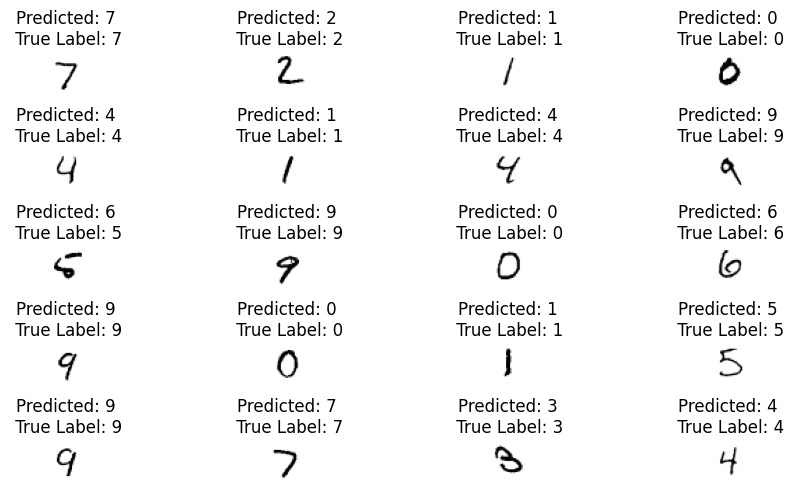

In [93]:
# Display the first 10 images with their predicted labels
plt.figure(figsize=(10, 5))
for i in range(20):  # Display 10 images
    plt.subplot(5, 4, i + 1)  # 2 rows, 5 columns
    plt.imshow(X_test[i].reshape(28, 28), cmap=plt.get_cmap('Greys'))
    plt.title(f"Predicted: {predicted_labels[i]}\n True Label: {np.argmax(y_test[i])}")
    
    plt.axis('off')  # Hide axes
plt.tight_layout()
plt.show()

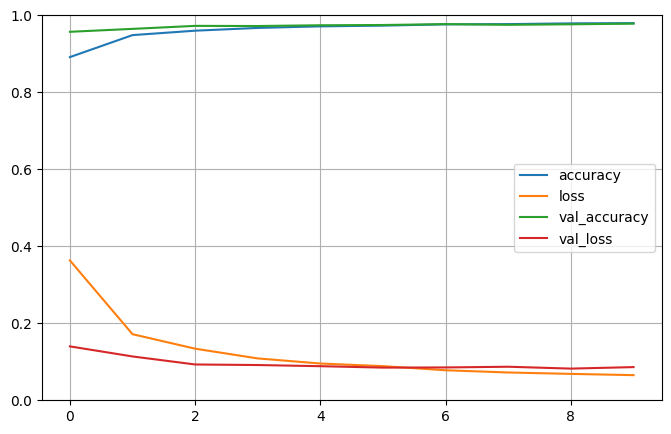

In [94]:
df = pd.DataFrame(history.history)
df.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Summary

This architecture is straightforward and effective for simple image classification problems. It balances model complexity and regularization by using dropout. The model can be easily extended by adding more layers or adjusting the number of neurons to fit different tasks or datasets.


## Funcation API

# Explanation of Using a Function to Build Layers in a Keras Model

---

## 1. Why use a function like `wide_block`?

- To **group multiple layers** together into a reusable block.
- Makes the code cleaner and easier to maintain.
- Avoids repeating the same layers multiple times.

---

## 2. What does the `wide_block` function do?

- Takes an input tensor `x`.
- Flattens the input (converts 2D image to 1D vector).
- Applies a Dense layer with ReLU activation.
- Applies Dropout for regularization.
- Applies another Dense layer.
- Returns the processed tensor.

---

## 3. How to use `wide_block` in the model?

- Define the input layer (e.g., shape `(28, 28)` for MNIST images).
- Pass the input through the `wide_block` function to get one feature branch.
- Create another branch of layers directly on the input.
- Concatenate the outputs of both branches.
- Add a final Dense layer with softmax activation for classification.
- Define the model with the input and final output.

---


In [95]:
def wide_block(x, hidden_layer=512, drop_out=0.2):
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(hidden_layer, activation='relu')(x)
    x = tf.keras.layers.Dropout(drop_out)(x)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    concat = tf.keras.layers.Concatenate()([x, x])
    
    return concat

In [96]:
input_layer  = tf.keras.layers.Input(shape=X_train.shape[1:]) # 28 * 28 = 784

block = wide_block (input_layer, 256,  0.2)

x = tf.keras.layers.Flatten()(input_layer)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)

concat = tf.keras.layers.Concatenate()([block,x])

output_layer = tf.keras.layers.Dense(10, activation='softmax')(concat)

model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 784)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_9 (Flatten)       │ (None, 784)            │              0 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_25 (Dense)          │ (None, 256)            │        200,960 │ flatten_9[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_12 (Dropout)      │ (None, 256)            │              0 │ dense_25[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_10 (Flatten)      │ (None, 784)            │              0 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_26 (Dense)          │ (None, 64)             │         16,448 │ dropout_12[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_27 (Dense)          │ (None, 128)            │        100,480 │ flatten_10[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_16            │ (None, 128)            │              0 │ dense_26[0][0],        │
│ (Concatenate)             │                        │                │ dense_26[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_28 (Dense)          │ (None, 64)             │          8,256 │ dense_27[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_17            │ (None, 192)            │              0 │ concatenate_16[0][0],  │
│ (Concatenate)             │                        │                │ dense_28[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_29 (Dense)          │ (None, 10)             │          1,930 │ concatenate_17[0][0]   │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 328,074 (1.25 MB)

 Trainable params: 328,074 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

In [97]:
# tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [98]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split = .2, verbose=1)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8772 - loss: 0.4102 - val_accuracy: 0.9631 - val_loss: 0.1185
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9658 - loss: 0.1105 - val_accuracy: 0.9697 - val_loss: 0.0977
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9787 - loss: 0.0689 - val_accuracy: 0.9718 - val_loss: 0.0901
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9854 - loss: 0.0470 - val_accuracy: 0.9747 - val_loss: 0.0894
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9877 - loss: 0.0373 - val_accuracy: 0.9758 - val_loss: 0.0874
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9892 - loss: 0.0333 - val_accuracy: 0.9732 - val_loss: 0.0999
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9910 - loss: 0.0279 - val_accuracy: 0.9754 - val_loss: 0.0986
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9920 - loss: 0.0230 - 

In [99]:
loss , acc = model.evaluate(X_test, y_test, verbose=1)
loss , acc 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9754 - loss: 0.1208


(0.10027182102203369, 0.9779000282287598)

In [100]:
# Predict the first 10 images in the test set
predictions = model.predict(X_test[:20])

# Get the predicted class labels
predicted_labels = np.argmax(predictions, axis=1)
predicted_labels


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4])

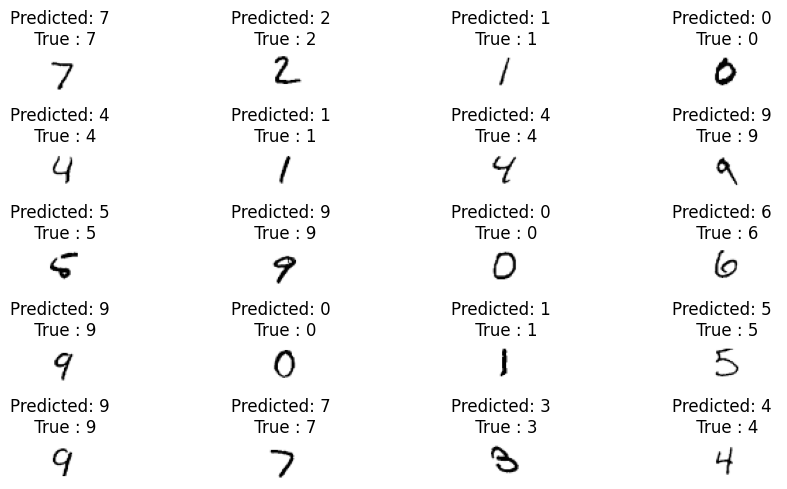

In [101]:
# Display the first 10 images with their predicted labels
plt.figure(figsize=(10, 5))
for i in range(20): 
    plt.subplot(5, 4, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap=plt.get_cmap('Greys'))
    plt.title(f"Predicted: {predicted_labels[i]} \n True : {np.argmax(y_test[i])}")
    plt.axis('off')  # Hide axes
plt.tight_layout()
plt.show()

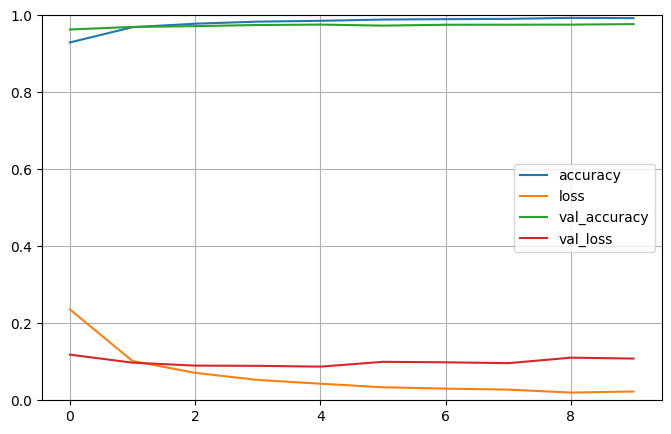

In [102]:
df = pd.DataFrame(history.history)
df.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


---

## Summary

- The `wide_block` function helps modularize your model.
- You can combine multiple feature extraction paths.
- Concatenating outputs allows the model to learn richer representations.
- This approach keeps your code organized and flexible.

---

# Subclassing API

# Explanation of the `WideDeepModel` Custom Keras Model

---

## 1. What is `WideDeepModel`?

- A **custom Keras model** subclassing `tf.keras.Model`.
- Combines a "wide" input (the flattened original input) with a "deep" network (several Dense layers).
- Outputs classification probabilities using a softmax layer.

---

## 2. Key components in `__init__`:

- `Flatten` layer: flattens the 2D input image into a 1D vector.
- Two Dense layers (`dense_layer_1` and `dense_layer_2`) with ReLU activation (or any specified activation).
- Dropout layers after each Dense layer to reduce overfitting.
- Final Dense layer with softmax activation for classification into `num_classes` categories.

---

## 3. What happens in the `call` method?

- Input `inputs` is flattened.
- Passed through the first Dense layer + dropout → `x1`.
- Passed through the second Dense layer + dropout → `x2`.
- Concatenate the output of the deep path (`x2`) with the original flattened input (`x`).
- Pass the concatenated vector to the output layer to get class probabilities.

---

## 4. The `build_graph` method:

- Creates a Keras functional model with an input shape `(28, 28)`.
- Calls the model on this input to build the computation graph.
- Useful for visualizing the model summary or plot.

---

In [103]:
class WideDeepModel(tf.keras.Model):
    def __init__(self, input_shape, num_classes, act="relu", drop_out=0.2, **kwargs):
        super(WideDeepModel, self).__init__(**kwargs)
        
        self.flatten = tf.keras.layers.Flatten()
        self.dense_layer_1 = tf.keras.layers.Dense(128, activation=act)
        self.drop_out_1 = tf.keras.layers.Dropout(drop_out)
        self.dense_layer_2 = tf.keras.layers.Dense(64, activation=act)
        self.drop_out_2 = tf.keras.layers.Dropout(drop_out)
        self.output_layer = tf.keras.layers.Dense(num_classes, activation='softmax')

    def call(self, inputs):
        x = self.flatten(inputs)
        x1 = self.dense_layer_1(x)
        x1 = self.drop_out_1(x1)
        x2 = self.dense_layer_2(x1)
        x2 = self.drop_out_2(x2)
        
        concat = tf.keras.layers.Concatenate()([x2, x])
        
        output = self.output_layer(concat)
        return output

    def build_graph(self):
        x = tf.keras.Input(shape=(28, 28))  
        return tf.keras.Model(inputs=[x], outputs=self.call(x))


In [104]:
model = WideDeepModel(input_shape=(28, 28), num_classes=10)
model.build_graph() 
model.summary()


Model: "wide_deep_model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 10)                  │           8,490 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,226 (457.91 KB)

 Trainable params: 117,226 (457.91 KB)

 Non-trainable params: 0 (0.00 B)

In [105]:
# tf.keras.utils.plot_model(model.build_graph(), show_shapes=False, show_layer_names=True, to_file='model.png')

In [106]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=12, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8398 - loss: 0.5341 - val_accuracy: 0.9577 - val_loss: 0.1453
Epoch 2/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9624 - loss: 0.1267 - val_accuracy: 0.9682 - val_loss: 0.1083
Epoch 3/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9735 - loss: 0.0810 - val_accuracy: 0.9697 - val_loss: 0.1010
Epoch 4/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9828 - loss: 0.0549 - val_accuracy: 0.9692 - val_loss: 0.1072
Epoch 5/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9863 - loss: 0.0419 - val_accuracy: 0.9730 - val_loss: 0.0970
Epoch 6/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9884 - loss: 0.0341 - val_accuracy: 0.9743 - val_loss: 0.0912
Epoch 7/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9916 - loss: 0.0259 - val_accuracy: 0.9732 - val_loss: 0.1056
Epoch 8/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9926 - loss: 0.0211 - 

In [107]:
loss, acc = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', loss)
print('Test accuracy:', acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9705 - loss: 0.1266
Test loss: 0.1158367395401001
Test accuracy: 0.9733999967575073


In [108]:
predictions = model.predict(X_test[:20])
predicted_labels = np.argmax(predictions, axis=1)
predicted_labels

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4])

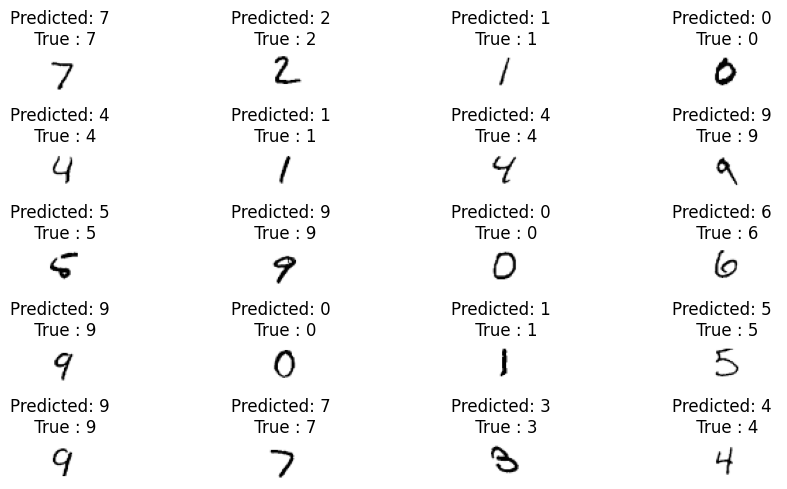

In [109]:
# Display the first 10 images with their predicted labels
plt.figure(figsize=(10, 5))
for i in range(20): 
    plt.subplot(5, 4, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap=plt.get_cmap('Greys'))
    plt.title(f"Predicted: {predicted_labels[i]} \n True : {np.argmax(y_test[i])}")
    plt.axis('off')  # Hide axes
plt.tight_layout()
plt.show()

In [110]:
np.argmax(y_test[8])

5

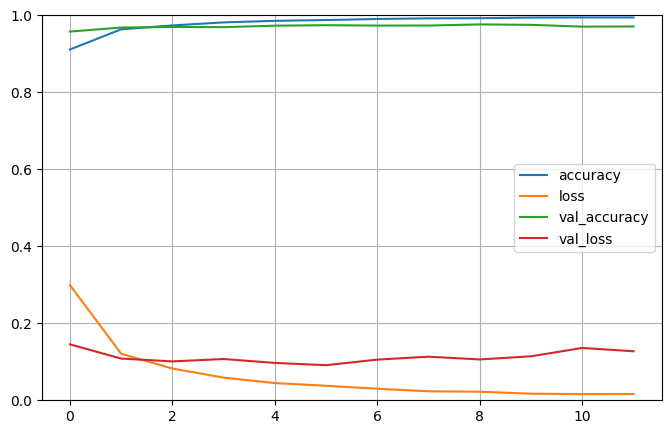

In [111]:
df = pd.DataFrame(history.history)
df.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Summary:

- This model combines **original input features** (wide part) with **learned deep features**.
- Using subclassing gives more flexibility for custom behavior.
- The concatenation step helps the model learn from both raw and processed features.
- `build_graph` helps visualize the model architecture.

---

